<a href="https://colab.research.google.com/github/SEJUNTONY/Data_Science_Class/blob/SJ/%EC%B2%AD%EB%AC%BC%ED%8F%AC21%EA%B8%B0_%EB%8D%B0%EC%82%AC_1117_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텐서플로우를 통한 자동차 연비 예측

In [1]:
# 데이터 분석을 위한 pandas, 시각화 위한 seaborn 불러오기
import pandas as pd
import seaborn as sns

In [2]:
# 자동차연비 데이터셋 mpg 불러오기
df = sns.load_dataset("mpg")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


# 결측치 확인

In [3]:
# 결측치 합계
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [4]:
# dropna
df = df.dropna()
df.shape

(392, 9)

In [5]:
# select_dtypes
df = df.select_dtypes(exclude="object")
df.shape

(392, 7)

In [6]:
# describe
df.describe(include="all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


# 데이터셋 나누기

In [7]:
# train_dataset
# test_dataset
# 기출문제로 공부 -> 실전 시험 보는 과정

train_dataset = df.sample(frac=0.8, random_state=42)
train_dataset.shape

test_dataset = df.drop(train_dataset.index)
test_dataset.shape

(78, 7)

In [8]:
# train_dataset, test_dataset에서 label(정답)을 꺼내 label 따로 생성
train_labels = train_dataset.pop("mpg")
train_labels

test_labels = test_dataset.pop("mpg")
test_labels.shape

(78,)

# 딥러닝 모델

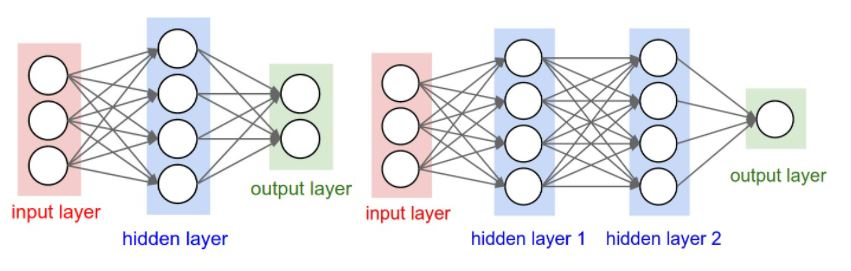

In [9]:
# tensorflow 불러오기
import tensorflow as tf

# 딥러닝 층 구성

In [10]:
model = tf.keras.Sequential()

# 64 --> 임의의 숫자를 입력해줘도 된다
# input shape ; 변수의 개수
model.add(tf.keras.layers.Dense(64, activation="relu", input_shape=[len(train_dataset.keys())]))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(1))

In [11]:
# mae : 오차에 대한 절대값의 평균
# mse : 모델의 오차를 어떻게 측정을 할 것인지
model.compile(loss="mse", metrics=["mae","mse"])

In [12]:
# 만든 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 딥러닝 모델로 학습하기
# epochs : 몇번을 이용해서 학습을 시킬 것인가
# verbose : log를 어떻게 찍을건지를 의미
model.fit(train_dataset, train_labels, epochs = 100, verbose = 1)

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 12438.5361 - mae: 51.8256 - mse: 12438.5361
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 227.7218 - mae: 12.6366 - mse: 227.7218
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 4324.5923 - mae: 55.1372 - mse: 4324.5923
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 2060.5879 - mae: 31.0091 - mse: 2060.5879
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 2405.4353 - mae: 34.5277 - mse: 2405.4353
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 3894.9001 - mae: 51.5150 - mse: 3894.9001
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 770.0306 - mae: 23.9236 - mse: 770.0306
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 2775.8555 - mae: 39.4771 - mse: 2775.8555
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 2961.7673

In [14]:
# 딥러닝 모델로 평가
model.evaluate(test_dataset, test_labels)
# 평균적으로 절대값이 mae만큼 차이가 난다.
# mse같은 경우, error값을 제곱을 한 값이 mse정도 된다
# mae값을 줄일수록 좋은 모델이라는 것을 확인 가능하다


3/3 [==============================] - 0s 5ms/step - loss: 28.9685 - mae: 4.1770 - mse: 28.9685


[28.968490600585938, 4.176957130432129, 28.968490600585938]

In [15]:
# 딥러닝 모델의 예측하기
# flatten() : 1차원 형태로 만들어주기
predict_labels = model.predict(test_dataset).flatten()
predict_labels[:5]

array([16.220211, 14.195014, 26.266182, 24.240501, 15.844813],
      dtype=float32)

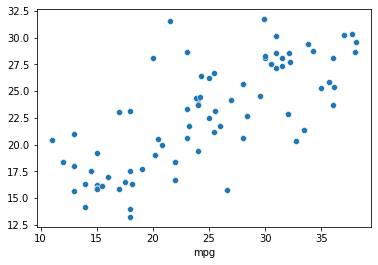

In [17]:
# 딥러닝 모델의 예측결과 평가하기
sns.scatterplot(x=test_labels, y=predict_labels)

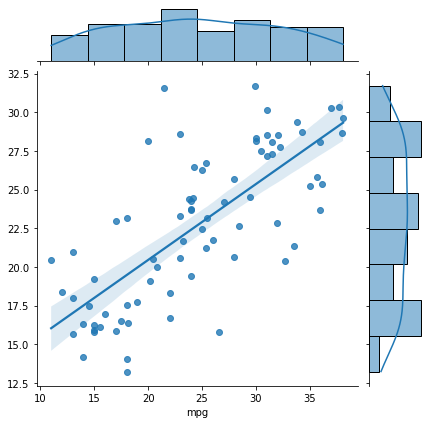

In [19]:
sns.jointplot(x=test_labels, y=predict_labels, kind="reg")